In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl import load_workbook
from sklearn import metrics
import math
import numpy as np
from sklearn import preprocessing as pc

% matplotlib inline

#_____________MAKE CHANGES HERE_________________
file = 'ROCTesting.xlsx'

xl_workbook = pd.ExcelFile(file)  # Load the excel workbook

class_list = ['fist', 'l sign', 'palm', 'pinch','point right', 
              'point left', 'thumbs up', 'thumbs down', 'scissors', 'none']

#_________________MAKE CHANGES HERE______________
dict_thresholds = {'fist': 0.8, 'l sign': 0.8, 'palm': 0.7, 'pinch': 0.5,'point right': 0.70, 
              'point left': 0.65, 'thumbs up': 0.7, 'thumbs down': 0.3, 'scissors': 0.8, 'none': 0.2}


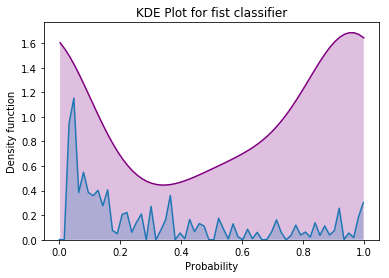

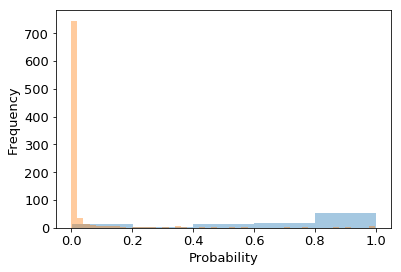

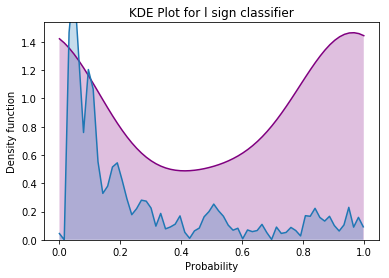

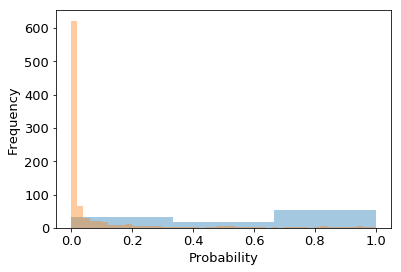

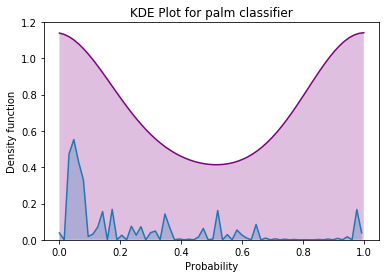

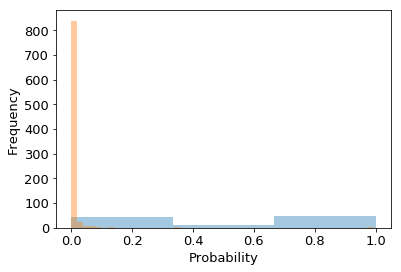

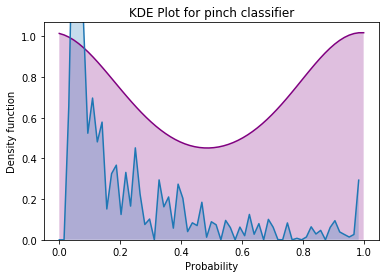

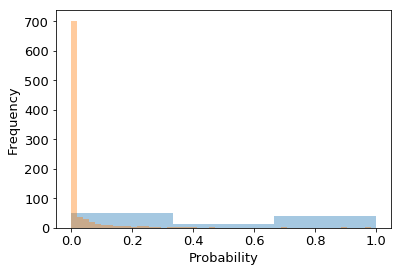

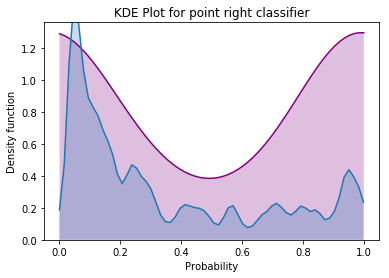

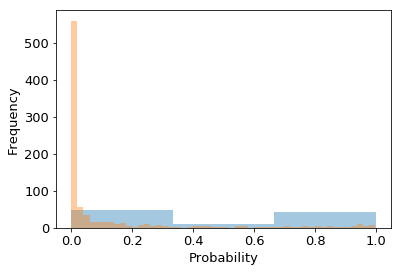

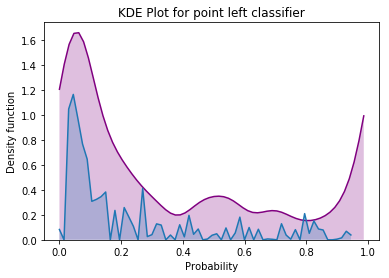

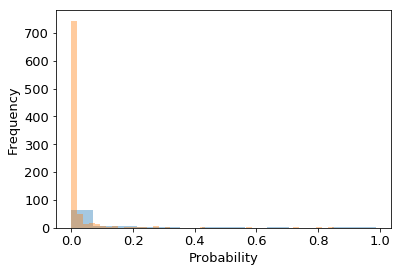

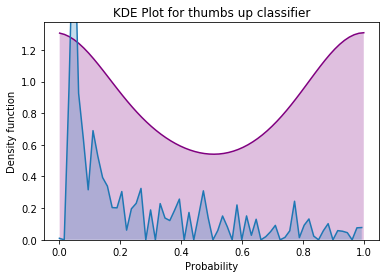

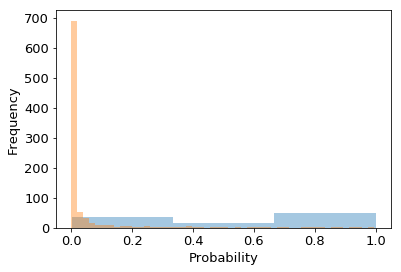

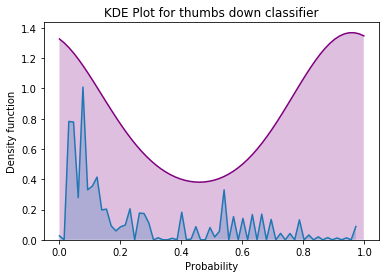

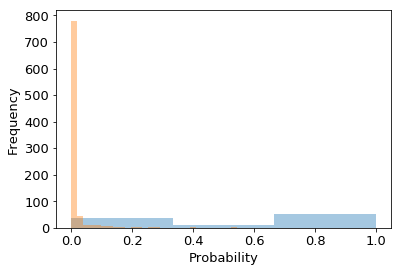

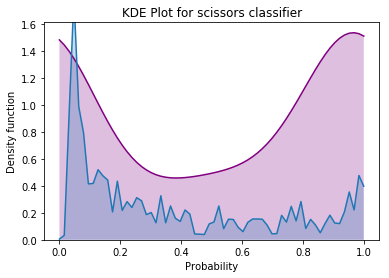

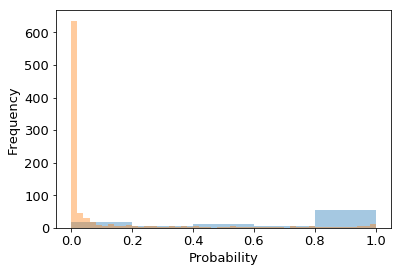

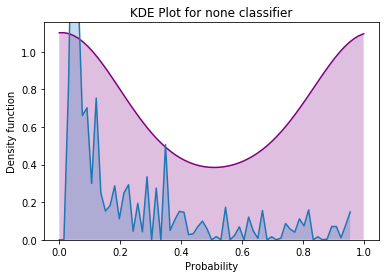

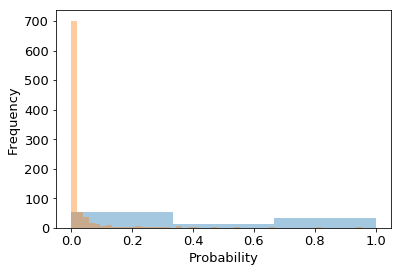

In [7]:
import seaborn as sns

#-------------- KDE PLOTS --------------
for class_type in class_list:
    df = xl_workbook.parse(class_type)  # Parse the sheet into a dataframe

    y_pred = df['y_pred'].tolist()
    y_test = df['y_test'].tolist()
    
    y_true = []
    y_false = []
    
    for i in range(len(y_test)):
        if y_test[i]:
            y_true.append(y_pred[i])
        else:
            y_false.append(y_pred[i])
                
    y_false1 = np.array(y_false)
    y_true1 = np.array(y_true)
    
    #------------- KDE PLOTS -----------------
    plt.title('KDE Plot for '+class_type+ ' classifier')
    g = sns.kdeplot(data=y_true1, shade=True, vertical=False, kernel='gau', bw='scott', gridsize=50, cut=0, clip=None, 
                    legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, 
                    color='purple')
    g1 = sns.kdeplot(data=y_false1, shade=True, vertical=False, kernel='gau', bw='scott', gridsize=50, cut=0, clip=None, 
                    legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None)
    plt.xlabel('Probability')
    plt.ylabel('Density function')
    
    #______________MAKE CHANGES HERE_________________
    #plt.savefig('E:/don/BTP/Latex Report/KDE_Images/'+'KDE_'+class_type+'.png')
    plt.show()
    
    
    
    #-----------------HISTOGRAMS --------------
    #plt.title('Histogram for '+class_type+ ' classifier')
    ax = sns.distplot(y_true1, bins=None, hist=True, kde=False, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, 
                 fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

    ax1 = sns.distplot(y_false1, bins=None, hist=True, kde=False, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, 
                 fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.xlabel('Probability', fontsize = 13)
    plt.ylabel('Frequency', fontsize = 13)
    
    #______________MAKE CHANGES HERE_________________
    plt.savefig('E:/don/BTP/Latex Report/Histograms/'+'H_'+class_type+'.png')
    plt.show()
    
    

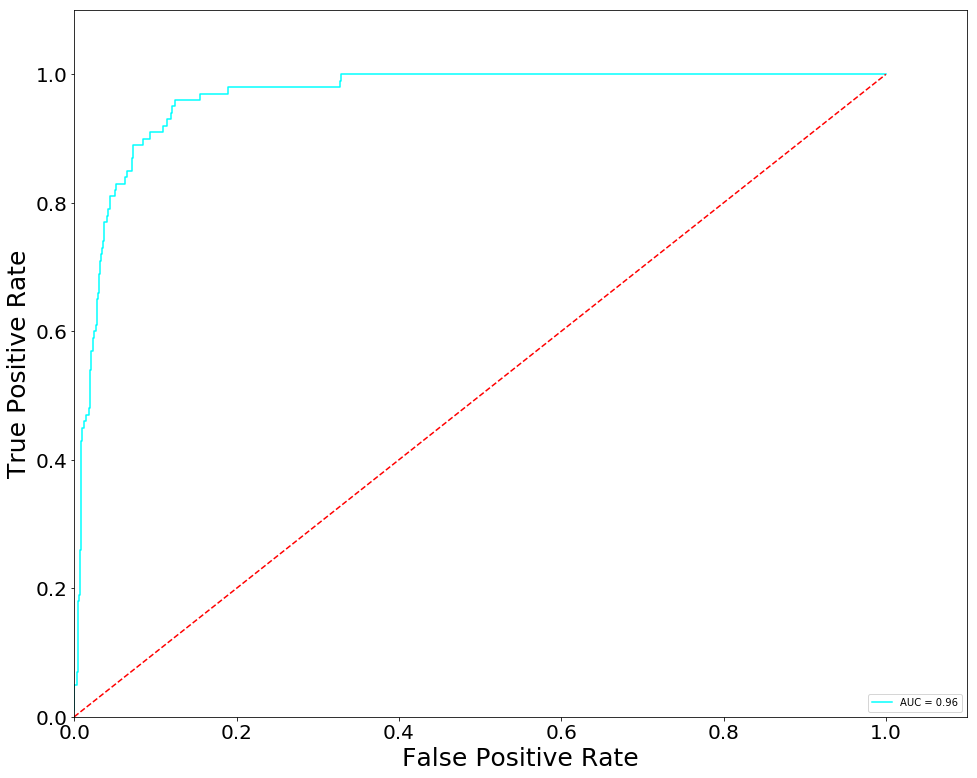

fist
[[882  18]
 [ 48  52]]


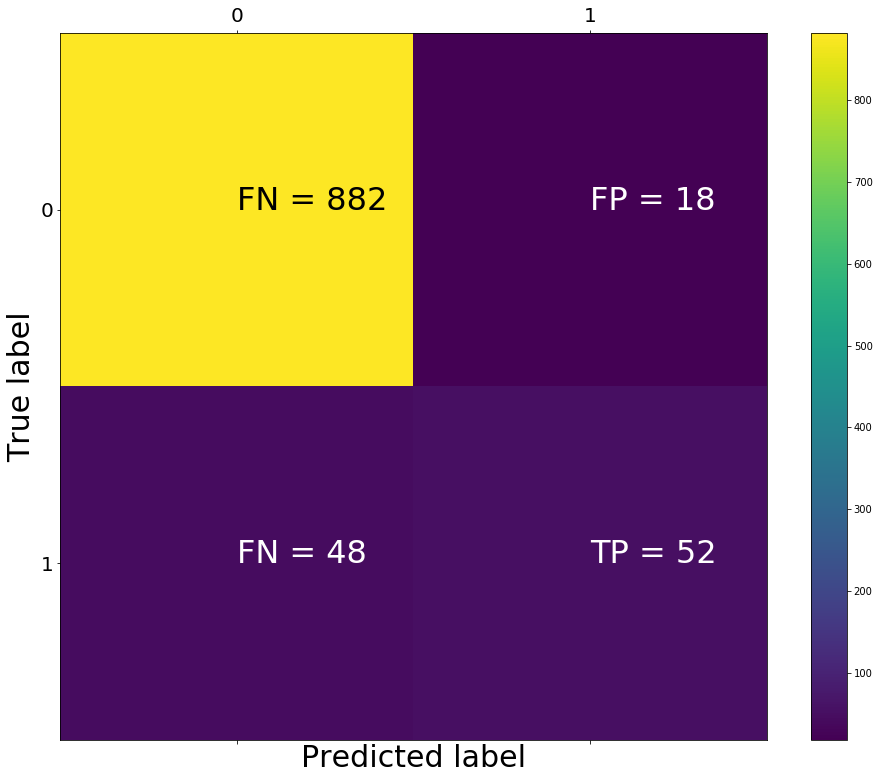

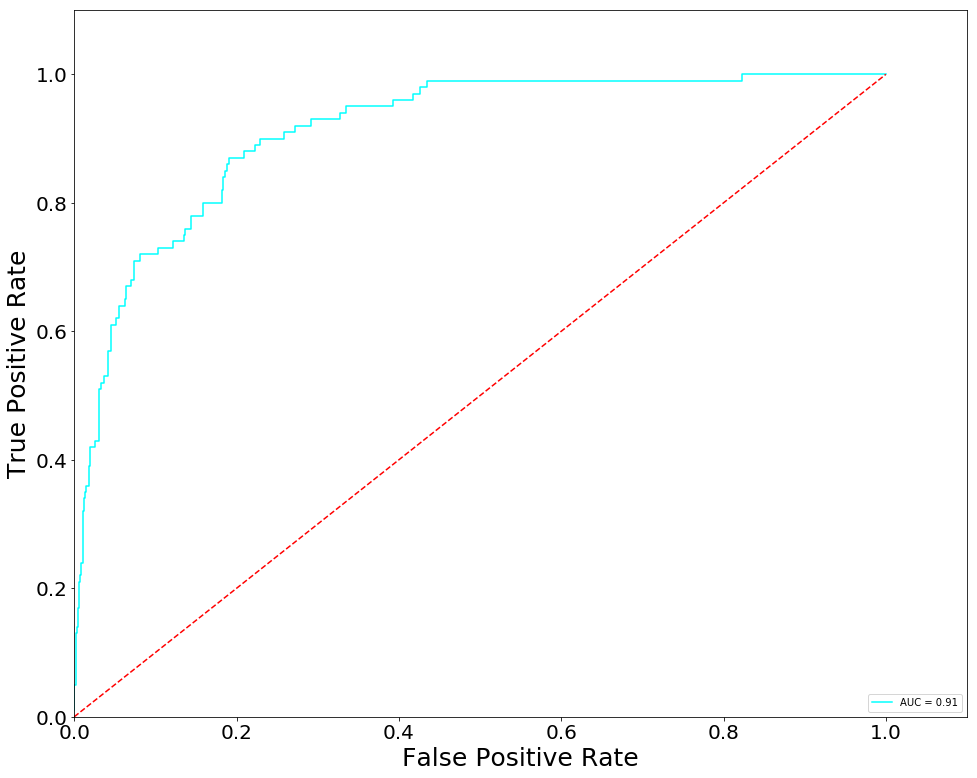

l sign
[[873  27]
 [ 57  43]]


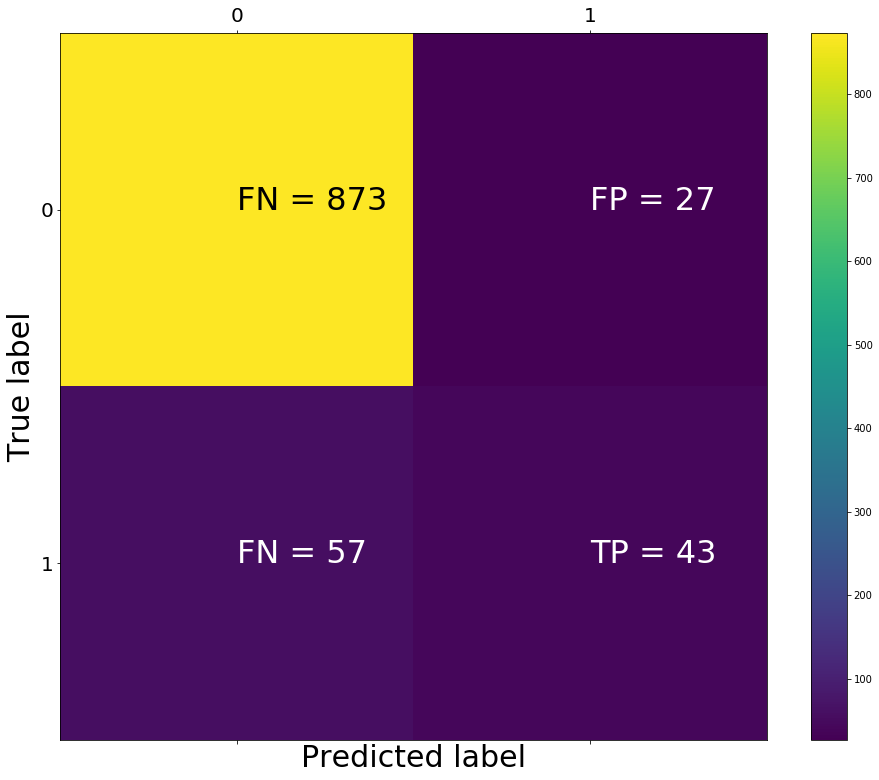

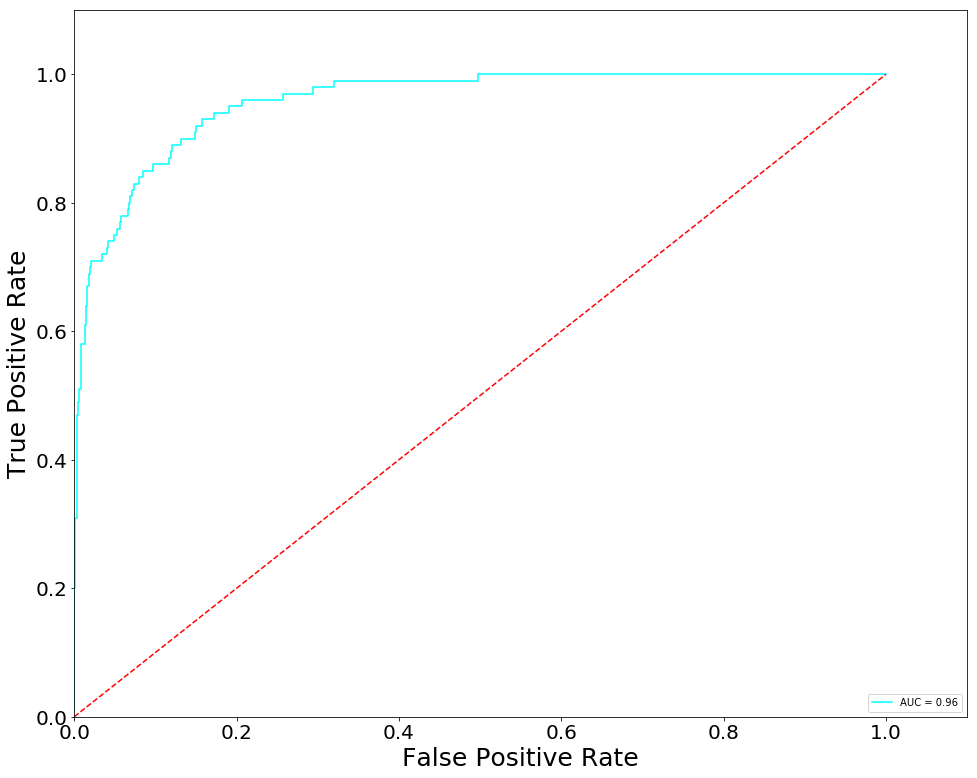

palm
[[897   3]
 [ 55  45]]


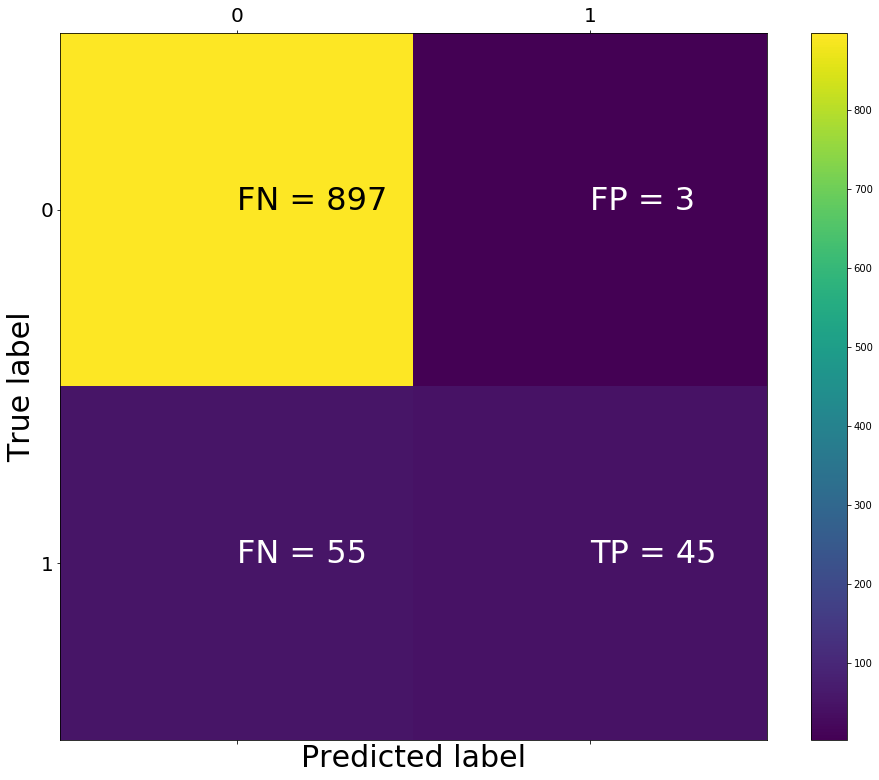

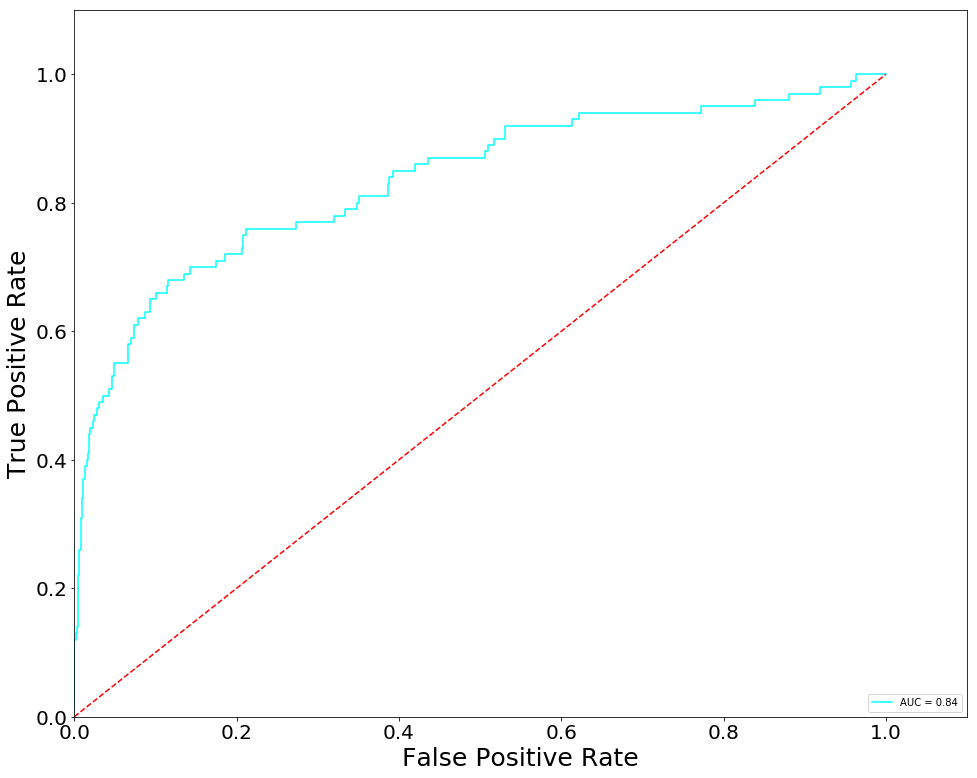

pinch
[[881  19]
 [ 55  45]]


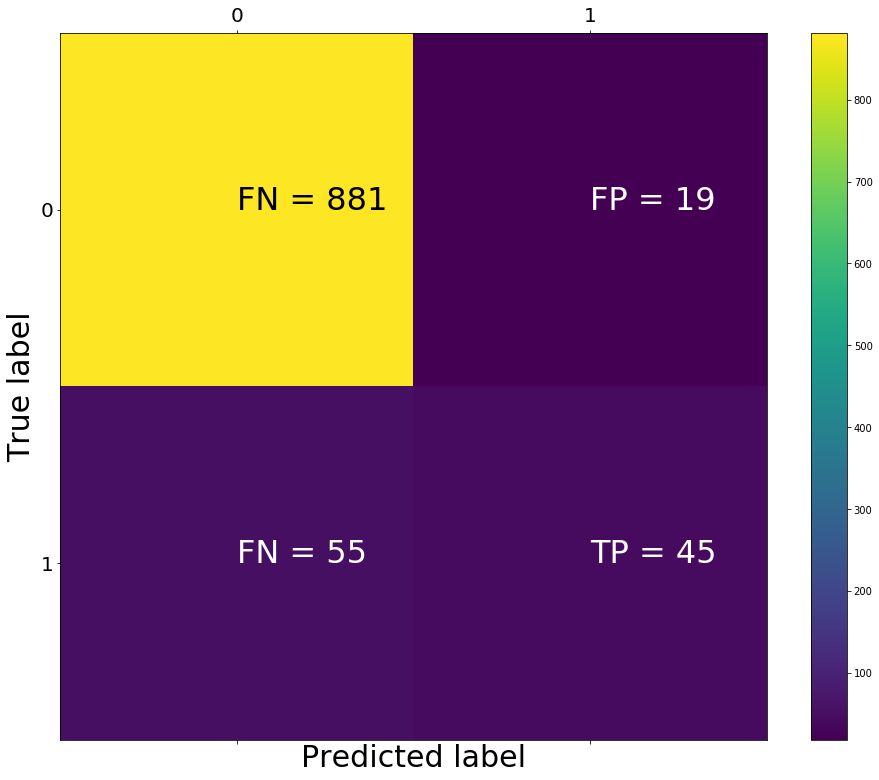

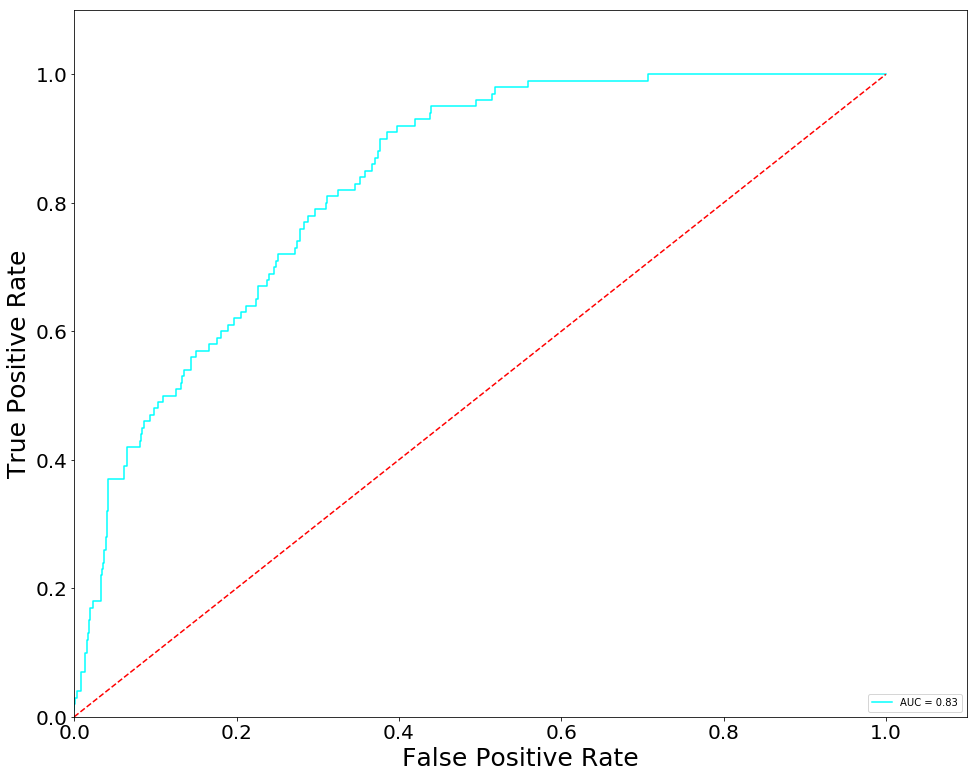

point right
[[833  67]
 [ 58  42]]


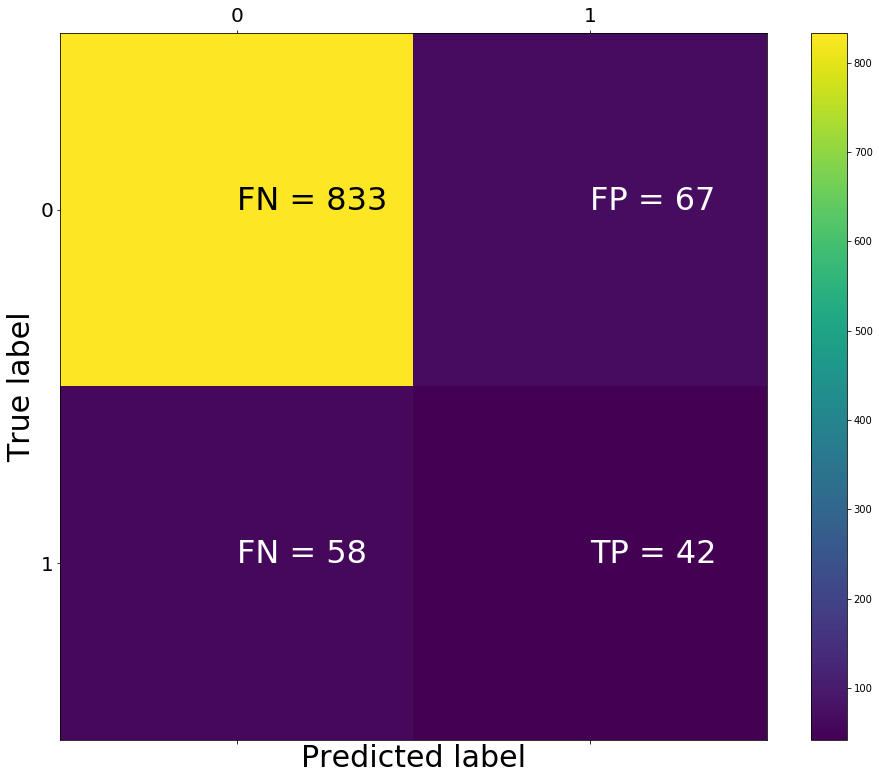

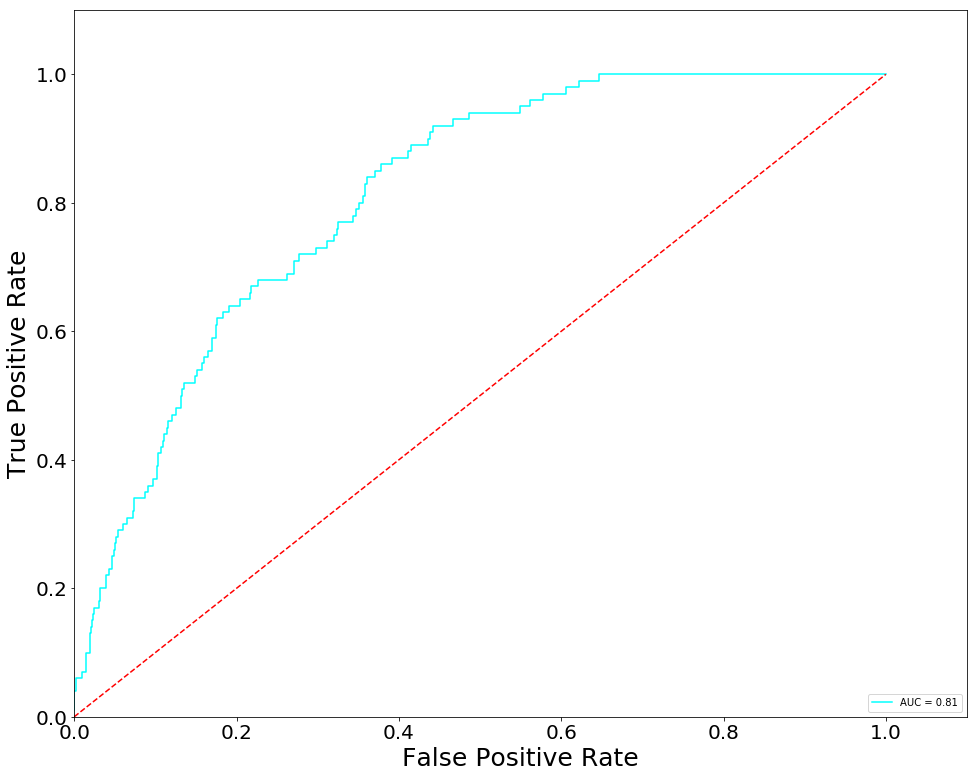

point left
[[887  13]
 [ 90  10]]


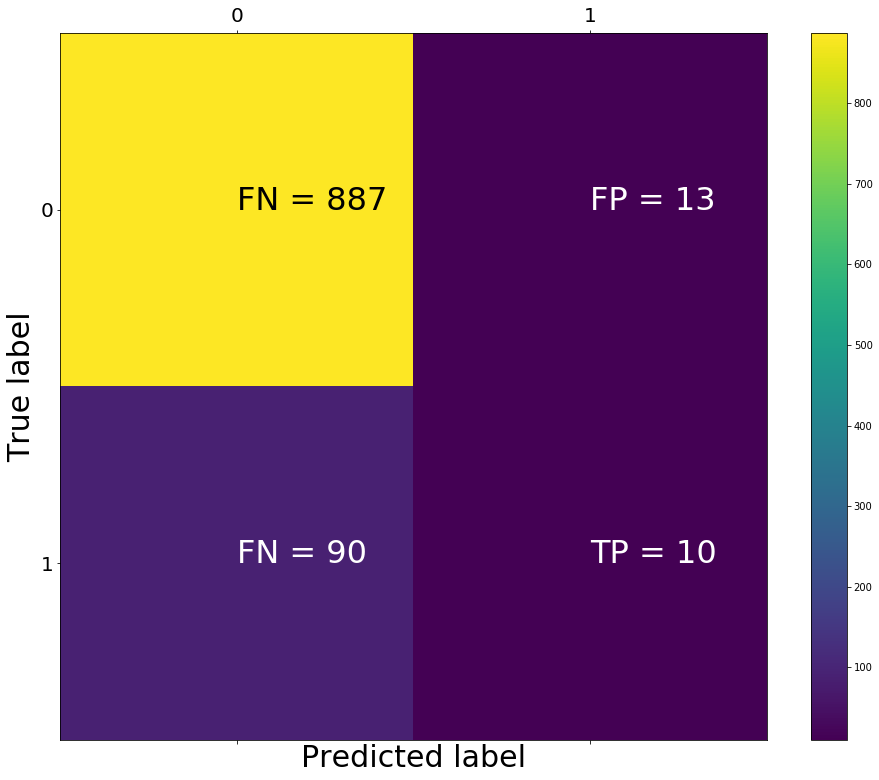

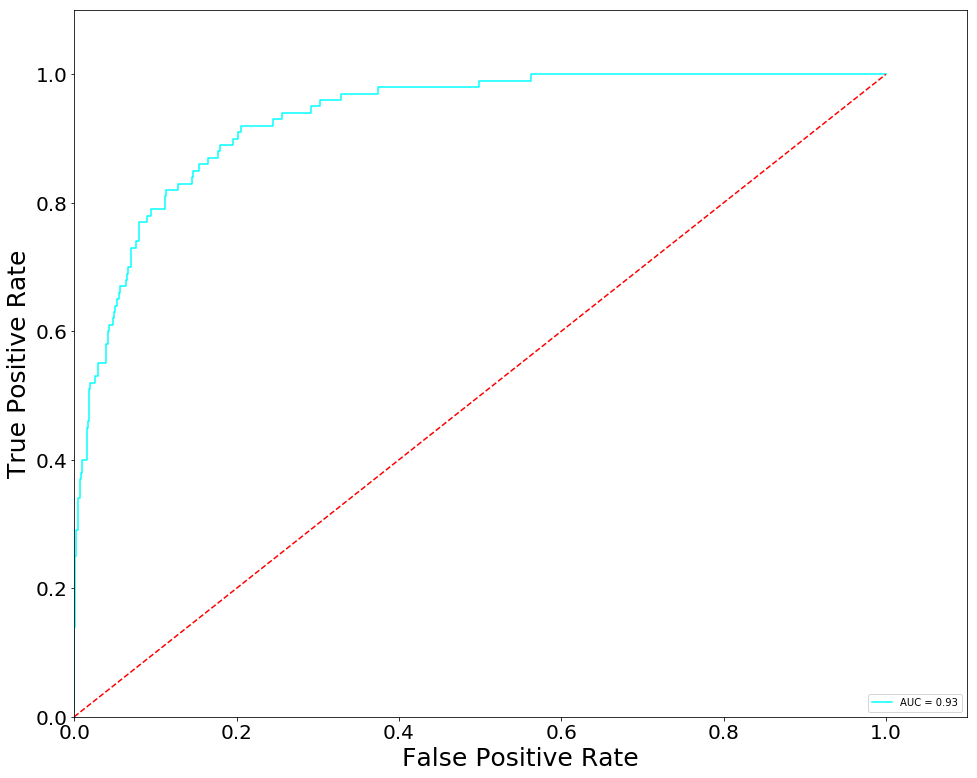

thumbs up
[[885  15]
 [ 55  45]]


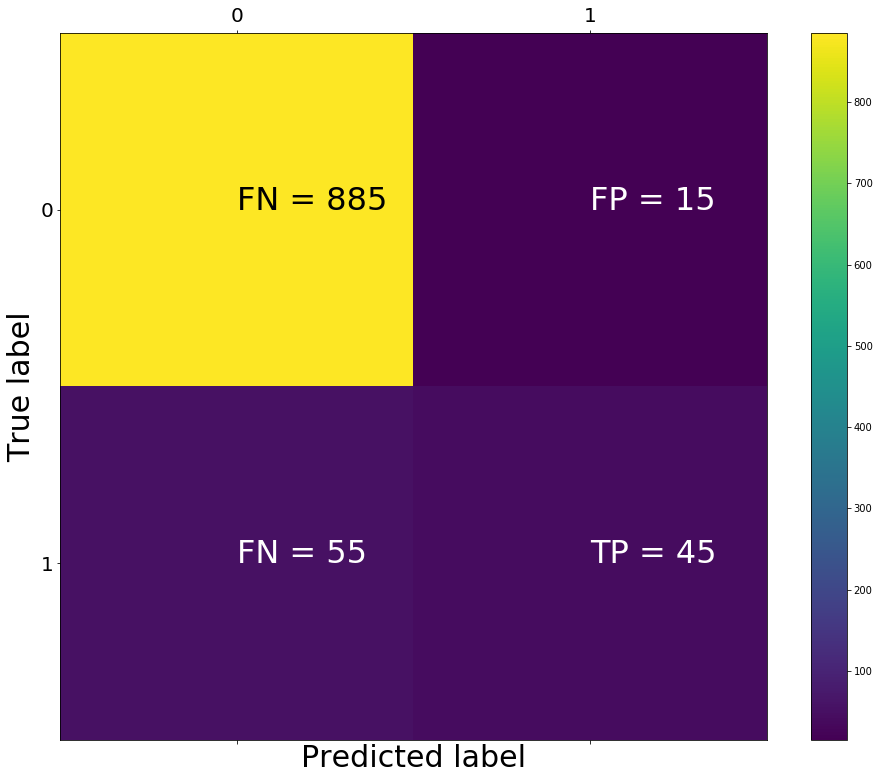

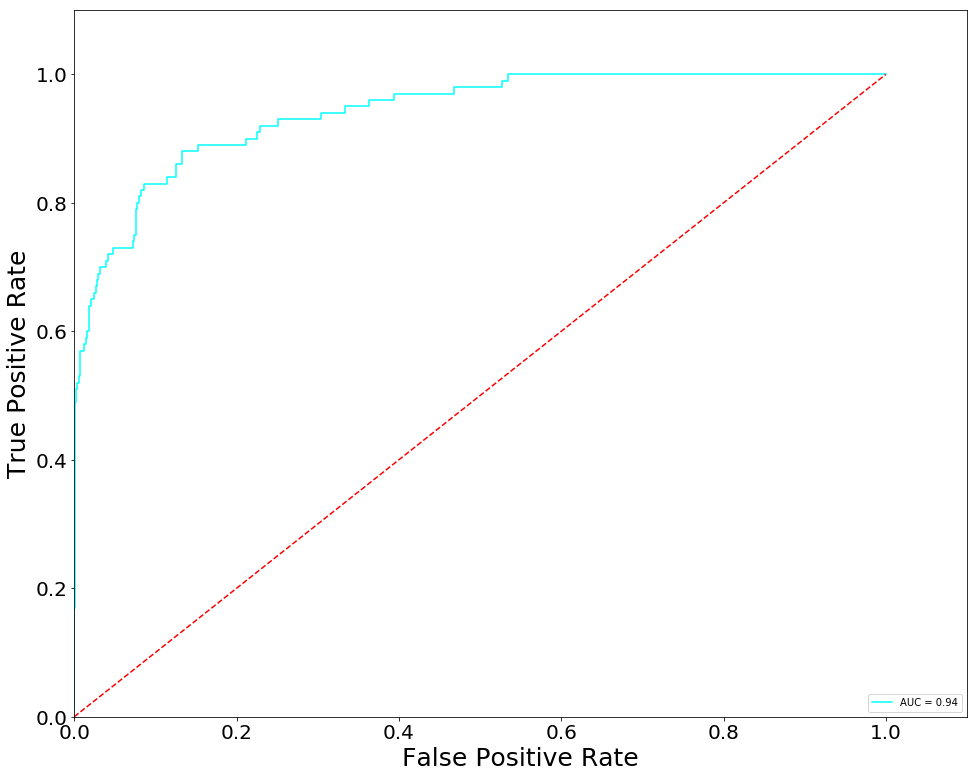

thumbs down
[[884  16]
 [ 36  64]]


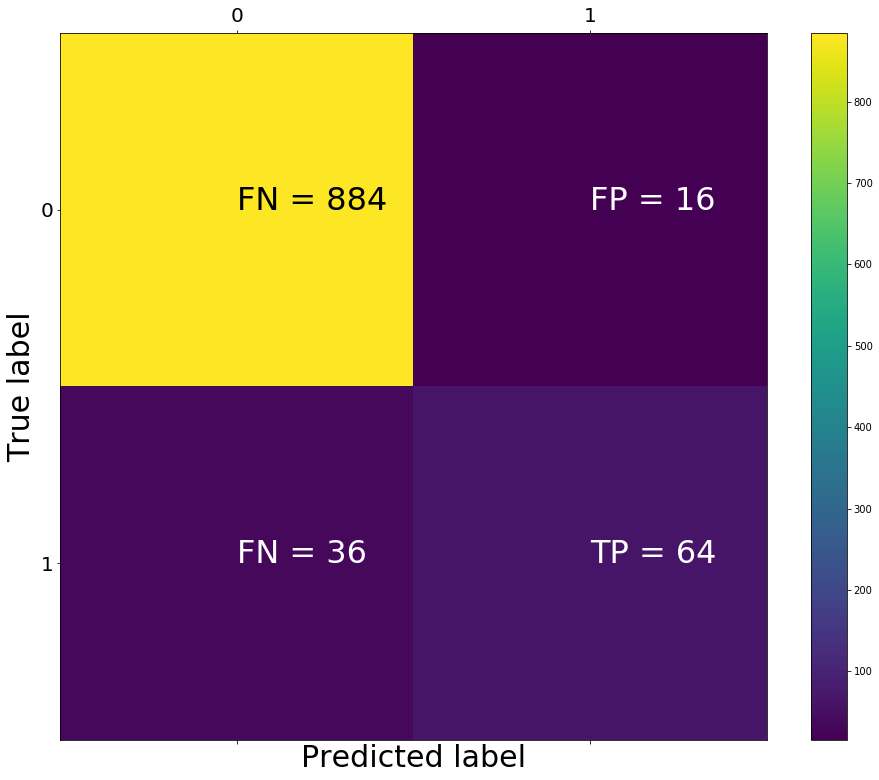

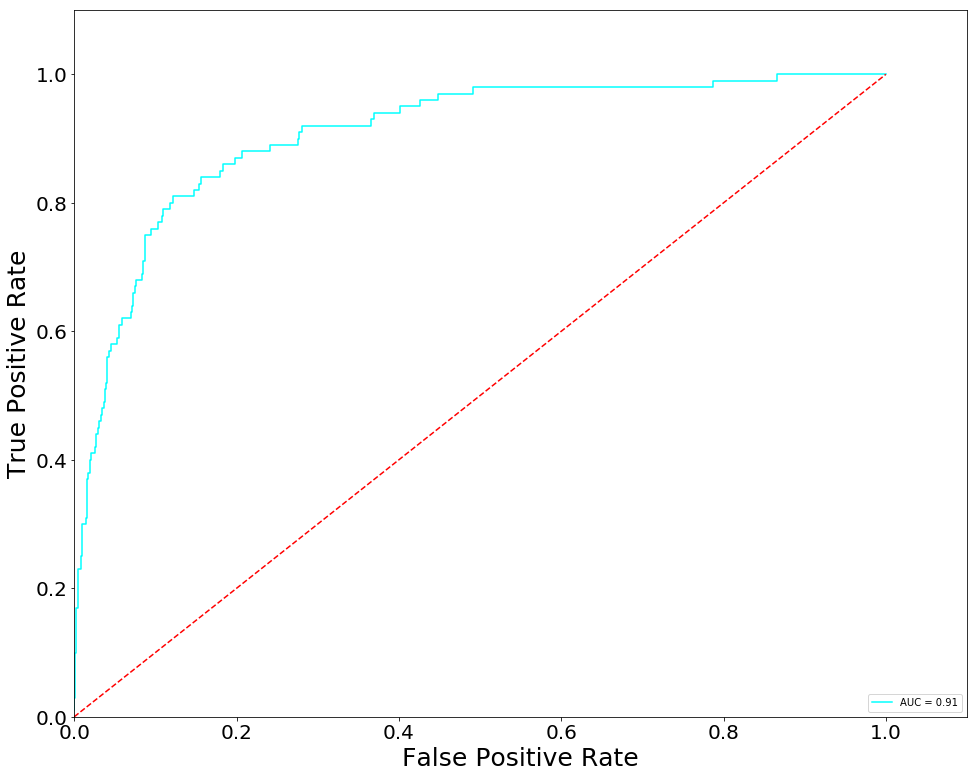

scissors
[[862  38]
 [ 44  56]]


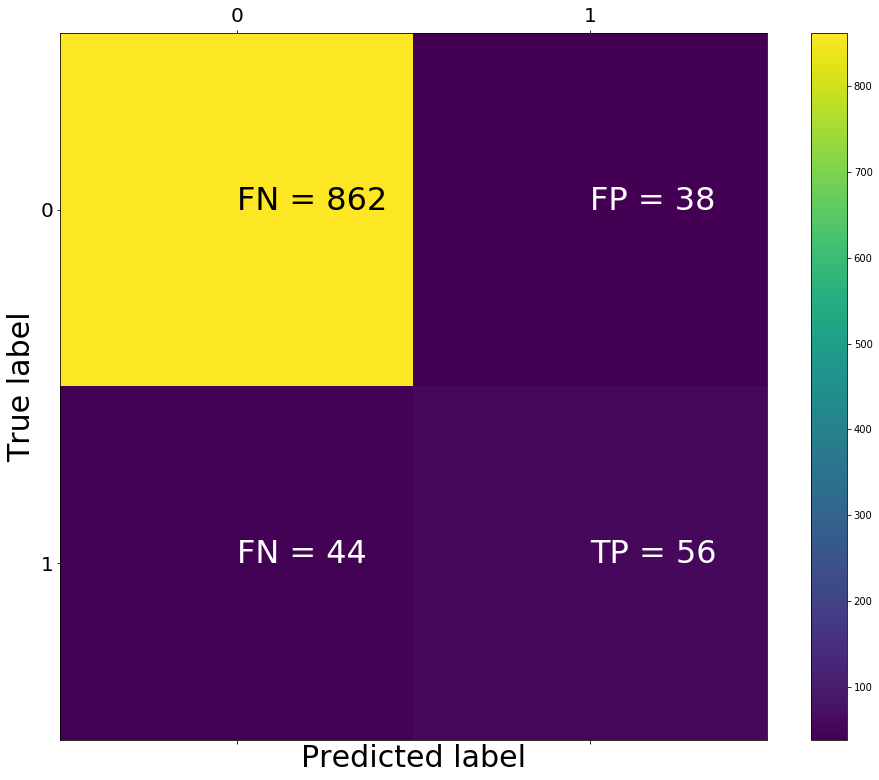

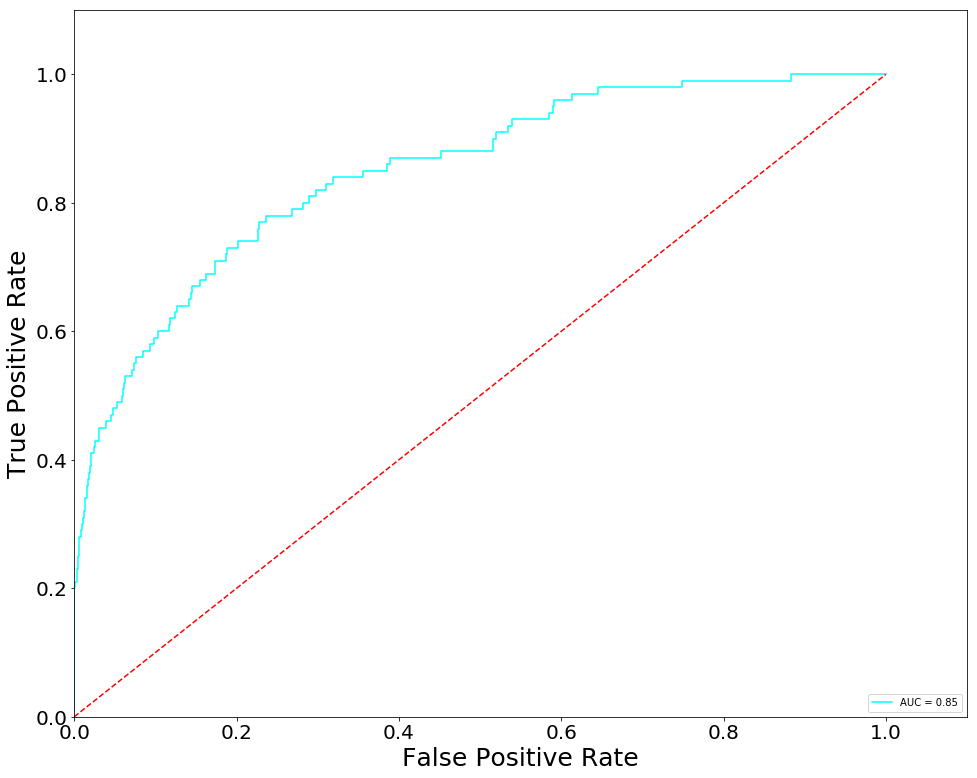

none
[[846  54]
 [ 49  51]]


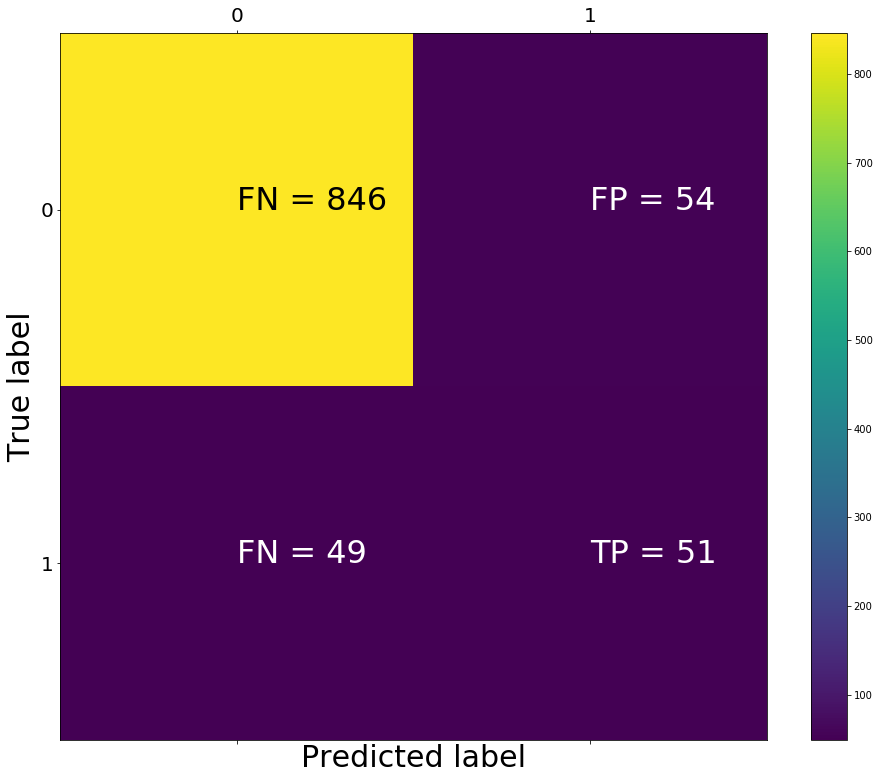

In [10]:
for class_type in class_list:
    df = xl_workbook.parse(class_type)  # Parse the sheet into a dataframe

    y_test_read = df['y_test'].tolist()
    y_test = np.array(y_test_read)
    
    y_pred_read = df['y_pred'].tolist()
    y_pred = np.array(y_pred_read)

    #fpr, tpr, threshold = metrics.roc_curve(actual in 1 and 0, predictions in decimal probabilities)
    #tpr = sensitivity or true positive rate
    #fpr = 1-specificity or false positive rate
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    #-----------Plot ROC Curve--------------
    fig = plt.figure()
    #plt.title('ROC ' + class_type)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 16
    fig_size[1] = 13
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(fpr, tpr, 'cyan', label = 'AUC = %0.2F' %roc_auc)
    plt.legend(loc = 'lower right',)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1.1])
    plt.ylim([0,1.1])
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylabel('True Positive Rate', fontsize = 25)
    plt.xlabel('False Positive Rate', fontsize = 25)
    plt.colors   
    #______________MAKE CHANGES HERE_________________
    plt.savefig('E:/don/BTP/Latex Report/ROC_Images/'+'ROC_'+class_type+'.png')
    plt.show()
    
    #----------Get Threshold------------------
    #Method 1: ROC01
    #index = np.argmin( [math.sqrt((tpr[i]-1)**2 + fpr[i]**2)                
    #                       for i in range(len(tpr))] )
    #print (threshold[index])
    #TH = threshold[index]
    
    #Method 2: Youden Index
    #index = np.argmax([tpr[i]-fpr[i] for i in range(len(tpr))])    
    #print (threshold[index])
    #TH = threshold[index]
    
    #Method 3: MaxProdSpSe
    #index = np.argmax([tpr[i]*(1-fpr[i]) for i in range(len(tpr))])
    #print (threshold[index])
    #TH = threshold[index]
    
    #Method 4: MaxSumSpSe
    #index = np.argmax([tpr[i]+(1-fpr[i]) for i in range(len(tpr))])
    #print ("Threshold for MaxSum "+class_type+": "+str(threshold[index]))
    #TH = threshold[index]
    
    #Method 5: Weighted Youden
    #w1=0.76
    #index = np.argmax([2*(w1*tpr[i]+(1-w1)*(1-fpr[i]))-1 for i in range(len(tpr))])
    #print ("Threshold for Weighted Youden "+class_type+": "+str(threshold[index]))
    #TH = threshold[index]
    
    
    #-----------Binarize data wrt threshold-------------
    TH = dict_thresholds[class_type]
    print (class_type)
    for i in range(len(y_pred)):
        if y_pred[i] >= TH:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    
    #-----------Get Confusion Matrix----------------
    cm = metrics.confusion_matrix(y_test, y_pred)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    #plt.title('Confusion matrix of '+class_type+ ' classifier')
    fig.colorbar(cax)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel('Predicted label', fontsize = 30)
    plt.ylabel('True label', fontsize = 30)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            if(i==1 & j==0):
                plt.text(j,i, str(s[1][0])+" = "+str(cm[i][j]), fontsize = 32, color = 'black')
            else:    
                plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 32, color = 'white')
            
    plt.show()
    #_____________MAKE CHANGES HERE____________________
    #fig.savefig('E:/don/BTP/Latex Report/CM_Images/'+'CM_'+class_type+'.png')


    
   